In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('~/Predictive_Analytics/Week3/marketing_campaign.xlsx')
print('The dimension of our data is :',df.shape)

The dimension of our data is : (2240, 29)


In [3]:
pd.set_option('display.max_columns', 100)

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [5]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [6]:
#drop variables with high cardinality
df.drop('ID', axis=1, inplace=True)

In [7]:
df['Year_Birth'].value_counts().index.sort_values(ascending=True)

Int64Index([1893, 1899, 1900, 1940, 1941, 1943, 1944, 1945, 1946, 1947, 1948,
            1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
            1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
            1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
            1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
            1993, 1994, 1995, 1996],
           dtype='int64')

In [8]:
df['Education'].value_counts().index.sort_values(ascending=True)

Index(['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD'], dtype='object')

In [9]:
df['Education'] = df["Education"].replace('2n Cycle', "Master")

In [10]:
df['Education'].value_counts()

Graduation    1127
Master         573
PhD            486
Basic           54
Name: Education, dtype: int64

In [11]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [12]:
df['Marital_Status'] = df['Marital_Status'].replace(['YOLO', 'Alone', 'Absurd'], 'Single')

In [13]:
df['Dt_Customer'].value_counts().index.sort_values(ascending=True)

Index(['2012-07-30', '2012-07-31', '2012-08-01', '2012-08-02', '2012-08-03',
       '2012-08-04', '2012-08-05', '2012-08-06', '2012-08-07', '2012-08-08',
       ...
       '2014-06-20', '2014-06-21', '2014-06-22', '2014-06-23', '2014-06-24',
       '2014-06-25', '2014-06-26', '2014-06-27', '2014-06-28', '2014-06-29'],
      dtype='object', length=663)

In [14]:
#caculate the number of days of subscription for a customer
from datetime import datetime
def days_since(dates_series, date_format):
    n = len(dates_series)
    result = [0] * n

    for i in range(n):
        result[i] = (datetime.today()-datetime.strptime(dates_series[i], date_format)).days
    
    return result

df["Days_Customer"] = days_since(list(df.Dt_Customer), "%Y-%m-%d")
df = df.drop(columns="Dt_Customer")
df["Days_Customer"].head()

0    3118
1    2568
2    2767
3    2594
4    2616
Name: Days_Customer, dtype: int64

In [15]:
df.isnull().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Days_Customer           0
dtype: int64

## Fill missing data for income using kNNImputer()

In [16]:
def missing_rep(df):
    miss = df.isna().sum()
    miss = miss[miss>0]
    miss_p = miss/df.shape[0]
    miss_t = miss_p>0.03

    return pd.DataFrame({"Missings" : miss, "Proportion of Missings" : miss_p, "Higher than 3%" : miss_t})


missing_rep(df)

,Missings,Proportion of Missings,Higher than 3%
Income,24,0.010714,False


In [17]:
from sklearn.impute import KNNImputer
df['Income'] = KNNImputer(n_neighbors=4).fit_transform(df['Income'].values.reshape(-1,1))

In [18]:
df['Income'].isnull().sum()

0

In [19]:
#Singular value decomposition
for col in df.columns :
    if len(df[col].value_counts()) == 1 :
        print(df[col].value_counts())

3    2240
Name: Z_CostContact, dtype: int64
11    2240
Name: Z_Revenue, dtype: int64


In [20]:
#because there is no variability in the data for the given columns we shall drop these
df.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

### Convert Categorical variables into numeric

In [21]:
df['Marital_Status'] = df['Marital_Status'].map({'Married': 0, 'Together': 1, 'Single': 2, 'Divorced': 3, 'Widow': 4}).astype(int)

In [22]:
df['Education'] = df['Education'].map({'Basic': 0, 'Graduation': 1,'Master': 2, 'PhD': 3}).astype(int)

In [23]:
df_1 = df.drop(columns=['Response'],axis=1)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_1,
                                                    df["Response"],
                                                    test_size=0.30,
                                                    random_state=42)

In [25]:
#Scale the data before fitting to the model
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train.values))
X_test = scaler.transform(X_test)

## Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [27]:
y_pred = LR.predict(X_test)

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       577
           1       0.72      0.38      0.50        95

    accuracy                           0.89       672
   macro avg       0.81      0.68      0.72       672
weighted avg       0.88      0.89      0.88       672



The Recall score for class 1 is very low. This can cause due to class imbalance

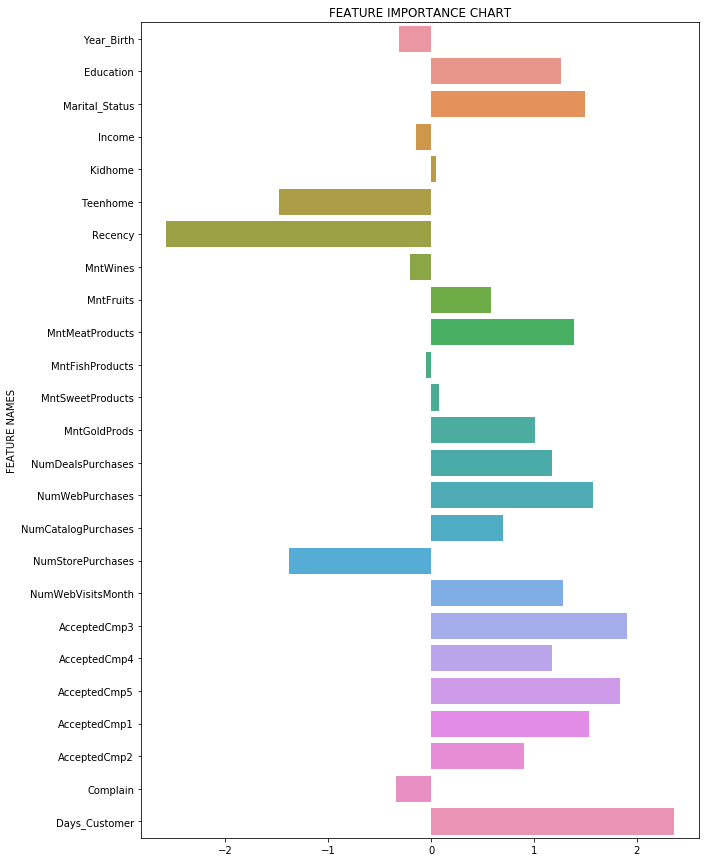

In [33]:
plt.figure(figsize=(10,15))
sns.barplot(x=LR.coef_[0], y=df_1.columns)
plt.title('FEATURE IMPORTANCE CHART')
plt.ylabel('FEATURE NAMES')
plt.show()

The positive values predict class 1 and the negative values predict class 0

The three most important parameters from this model are Days_customer, Recency and AcceptedCmp3

## SVM Classification

In [41]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [42]:
y_pred_SVM = svm.predict(X_test)

In [43]:
print(classification_report(y_test, y_pred_SVM))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       577
           1       0.76      0.36      0.49        95

    accuracy                           0.89       672
   macro avg       0.83      0.67      0.71       672
weighted avg       0.88      0.89      0.88       672



The Recall score is low for SVM too. But this has a better precision for class 1 than Logistic

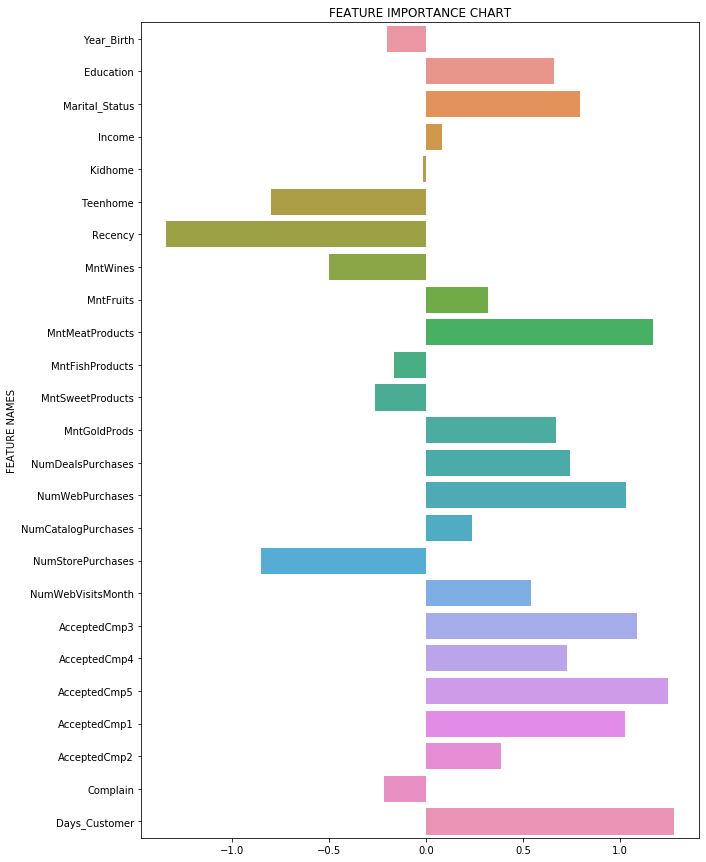

In [44]:
plt.figure(figsize=(10,15))
sns.barplot(x=svm.coef_[0], y=df_1.columns)
plt.title('FEATURE IMPORTANCE CHART')
plt.ylabel('FEATURE NAMES')
plt.show()

The important factors for this model are Days_customer, Recency, AcceptedCmp5